### Reference
- Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.

- Amrieh, E. A., Hamtini, T., & Aljarah, I. (2015, November). Preprocessing and analyzing educational data set using X-API for improving student's performance. In Applied Electrical Engineering and Computing Technologies (AEECT), 2015 IEEE Jordan Conference on (pp. 1-5). IEEE.

### Attribution

1. Gender - student's gender (nominal: 'Male' or 'Female’)
2. Nationality- student's nationality 
3. Place of birth- student's Place of birth 
4. Educational Stages- educational level student belongs 
5. Grade Levels- grade student belongs 
6. Section ID- classroom student belongs 
7. Topic- course topic 
8. Semester- school year semester 
9. Parent responsible for student 
10. Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)
11. Visited resources- how many times the student visits a course content (numeric:0-100)
12. Viewing announcements-how many times the student checks the new announcements (numeric:0-100)
13. Discussion groups- how many times the student participate on discussion groups (numeric:0-100)
14. Parent Answering Survey- parent answered the surveys which are provided from school or not
15. Parent School Satisfaction- the Degree of parent satisfaction from school
16. Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)
17. Class: Students' Degree of grade (L: low, M: medium, H: high)

### Prepare Dataset

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'markjoonholee'
os.environ['KAGGLE_KEY'] = ''

In [2]:
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

  0%|                                               | 0.00/5.54k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 5.54k/5.54k [00:00<00:00, 5.87MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


In [58]:
import pandas as pd
data = pd.read_csv("./data/xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### EDA

##### Check Data

In [59]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [61]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [62]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [63]:
data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [64]:
data['NationalITy'].value_counts() # almost same a PlaceofBirth

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
USA              6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

##### Numeric Data Histograms

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='raisedhands', ylabel='Count'>

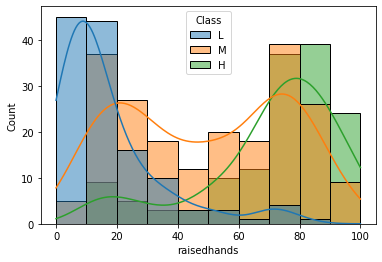

In [66]:
sns.histplot(x='raisedhands', data=data, hue='Class', hue_order=['L', 'M', 'H'], kde=True) # Good to check for Low

<AxesSubplot:xlabel='VisITedResources', ylabel='Count'>

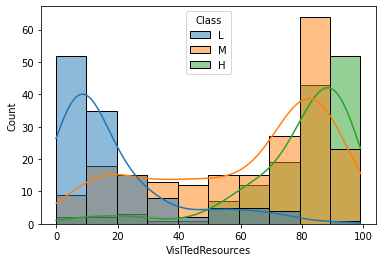

In [67]:
sns.histplot(x='VisITedResources', data=data, hue='Class', hue_order=['L', 'M', 'H'], kde=True) # Better to check for Low

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Count'>

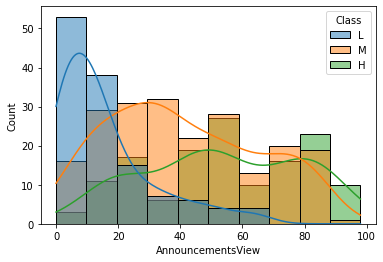

In [68]:
sns.histplot(x='AnnouncementsView', data=data, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

<AxesSubplot:xlabel='Discussion', ylabel='Count'>

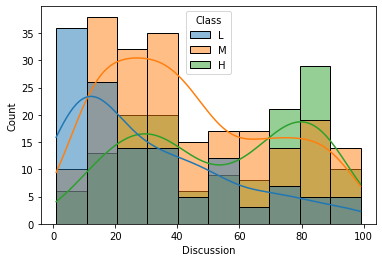

In [69]:
sns.histplot(x='Discussion', data=data, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

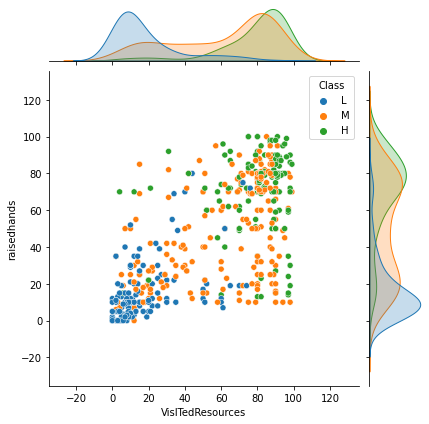

In [70]:
sns.jointplot(x='VisITedResources', y='raisedhands', data=data, hue='Class', hue_order=['L', 'M', 'H']) # looks okay

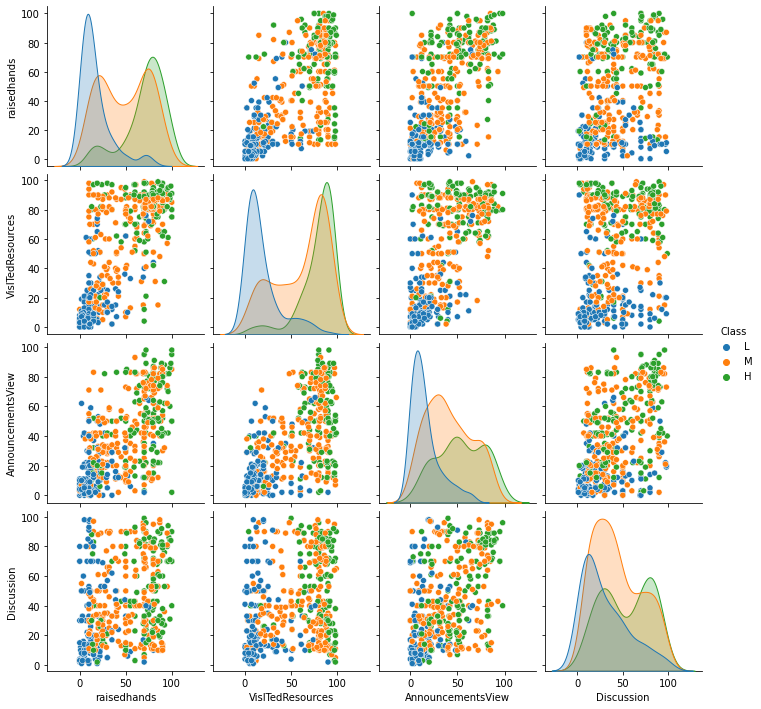

In [71]:
sns.pairplot(data, hue='Class', hue_order=['L', 'M', 'H'])
# Discussion bad
# VisitedResources, raisedhands looks okay

##### Category Data using Countplot

<AxesSubplot:xlabel='Class', ylabel='count'>

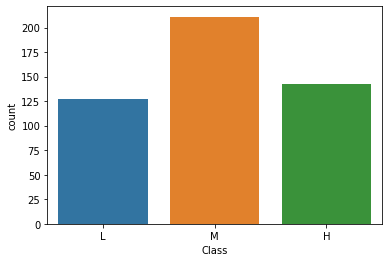

In [72]:
sns.countplot(x='Class', data=data, order=['L', 'M', 'H'])

<AxesSubplot:xlabel='gender', ylabel='count'>

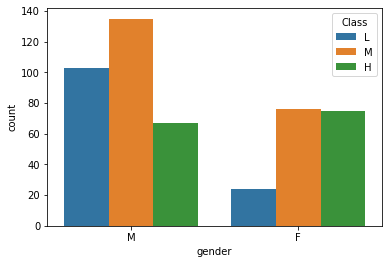

In [73]:
sns.countplot(x='gender', data=data, hue='Class', hue_order=['L', 'M', 'H'])

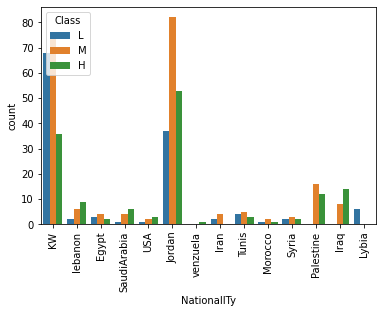

In [74]:
sns.countplot(x='NationalITy', data=data, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

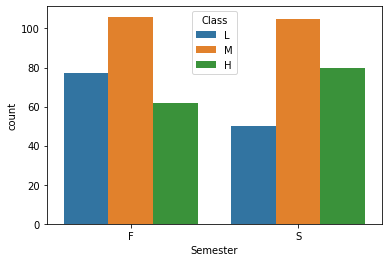

In [75]:
sns.countplot(x='Semester', data=data, hue='Class', hue_order=['L', 'M', 'H'])
plt.show() # Can be good Feature! :)

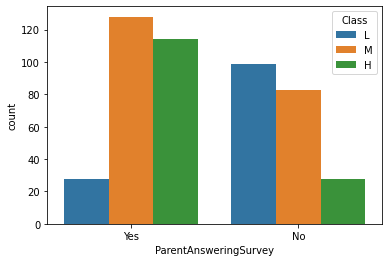

In [76]:
sns.countplot(x='ParentAnsweringSurvey', data=data, hue='Class', hue_order=['L', 'M', 'H'])
plt.show() # Can be good Feature! :)

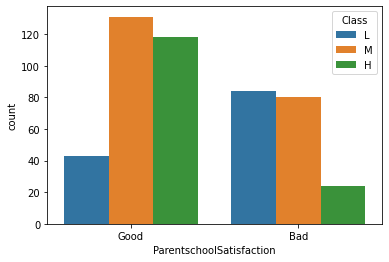

In [77]:
sns.countplot(x='ParentschoolSatisfaction', data=data, hue='Class', hue_order=['L', 'M', 'H'])
plt.show() # Can be good but not sure :( 

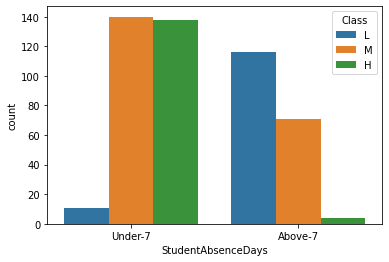

In [78]:
sns.countplot(x='StudentAbsenceDays', data=data, hue='Class', hue_order=['L', 'M', 'H'])
plt.show() # Can be good :)

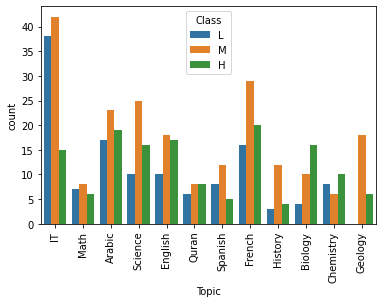

In [79]:
sns.countplot(x='Topic', data=data, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

##### Categorical -> Numerical

In [80]:
# L: -1, M: 0, H: 1
data['class_value'] = data['Class'].map(dict(L=-1, M=0, H=1))
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


gender
F    0.291429
M   -0.118033
Name: class_value, dtype: float64

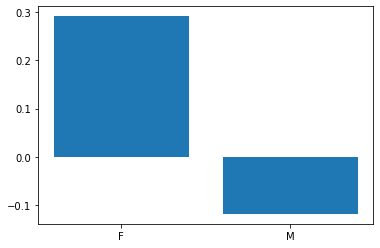

In [81]:
gb_gender = data.groupby('gender').mean()['class_value']
plt.bar(gb_gender.index, gb_gender)
gb_gender

<BarContainer object of 12 artists>

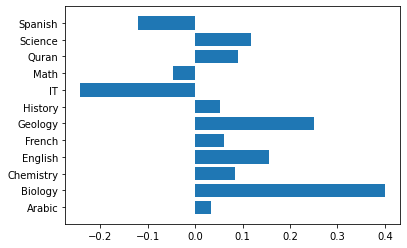

In [82]:
gb_topic = data.groupby('Topic').mean()['class_value']
plt.barh(gb_topic.index, gb_topic)

<BarContainer object of 12 artists>

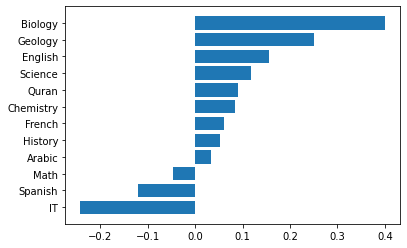

In [83]:
gb_topic = data.groupby('Topic').mean()['class_value'].sort_values(ascending=True)

plt.barh(gb_topic.index, gb_topic)

<BarContainer object of 2 artists>

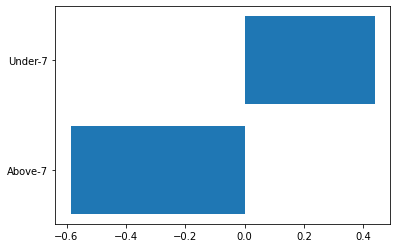

In [84]:
gb_abs = data.groupby('StudentAbsenceDays').mean()['class_value'].sort_values(ascending=True)

plt.barh(gb_abs.index, gb_abs)

### Data Preprocessing
##### Categorical data: One hot vector

In [85]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'class_value'],
      dtype='object')

In [89]:
X = pd.get_dummies(
    data=data.drop(['ParentschoolSatisfaction', 'Class', 'class_value'], axis=1),
    columns=[
        'gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
        'SectionID', 'Topic', 'Semester', 'Relation',
        'ParentAnsweringSurvey', 'StudentAbsenceDays'
    ],
    drop_first=True # prevent multicolinearlity
    
)
y = data['Class']

In [90]:
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


##### Test Train split

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Modeling
##### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [97]:
from sklearn.metrics import classification_report

In [98]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.78      0.76      0.77        33
           M       0.59      0.68      0.63        56

    accuracy                           0.69       144
   macro avg       0.72      0.70      0.71       144
weighted avg       0.70      0.69      0.70       144



##### XGBoost

In [102]:
from xgboost import XGBClassifier

In [103]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

/Users/joonholee/.local/share/virtualenvs/ml-dl-exercise-WKLxS9ad/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:58:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.79      0.69      0.74        55
           L       0.85      0.85      0.85        33
           M       0.65      0.73      0.69        56

    accuracy                           0.74       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.75      0.74      0.74       144



### Deep Analysis

##### Logistic Regression

In [114]:
model_lr.coef_[0,:]

array([ 2.53688507e-02,  2.23062507e-02,  1.86248911e-02,  1.02355577e-02,
       -7.69265209e-01, -8.34217520e-02,  3.84488426e-01,  1.43922226e-02,
        7.35624624e-02,  3.45646451e-03, -3.72624622e-01, -1.68156716e-01,
        7.91772665e-01,  3.58653541e-02, -2.46939006e-01,  6.00560314e-02,
       -4.58176750e-02,  0.00000000e+00, -8.34217520e-02,  3.84488426e-01,
       -6.07259324e-01,  1.21668194e-01,  3.45646451e-03, -3.72624622e-01,
       -1.09804260e-01,  9.19955593e-01,  3.52368324e-02,  4.02166436e-01,
       -4.30032199e-01,  7.78063791e-02,  0.00000000e+00, -2.62413072e-02,
        3.82469963e-01,  2.68785219e-01,  2.45052658e-04,  5.31493607e-01,
       -1.30829005e-01, -4.28340003e-01, -3.10416489e-01, -1.32978022e-02,
        5.84524608e-02, -6.46250907e-02, -3.79165291e-02, -1.72598653e-01,
        5.70995967e-01, -1.14110680e-01,  1.24797109e-01, -1.42615298e-01,
       -5.39315852e-01, -1.10218322e-01, -2.07521454e-01,  7.50875972e-01,
       -1.54027159e-01, -

In [110]:
model_lr.coef_.shape

(3, 59)

In [111]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

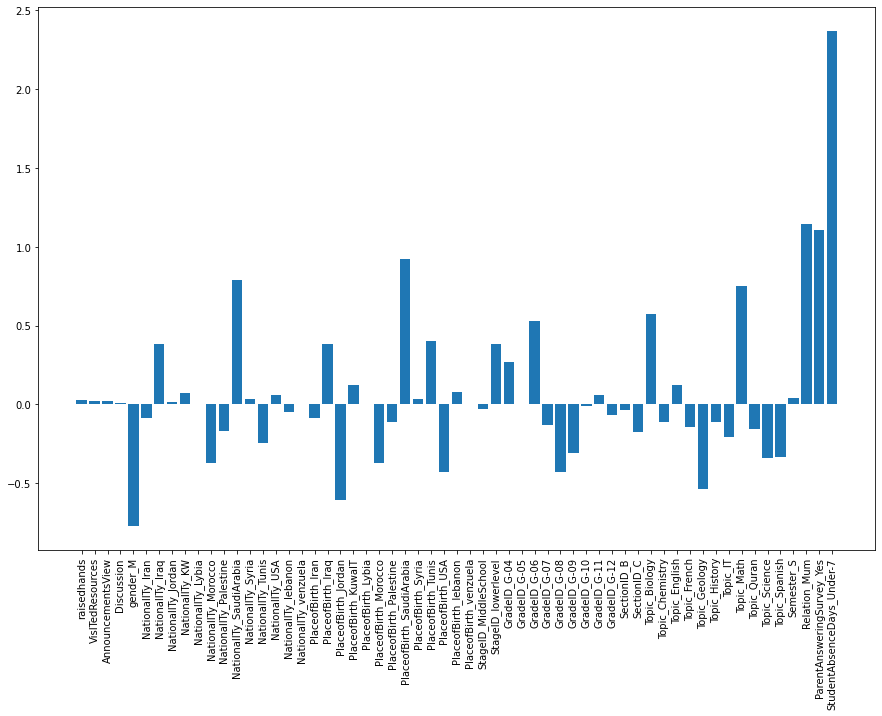

In [119]:
fig = plt.figure(figsize=(15, 10))
plt.bar(X.columns, model_lr.coef_[0, :]) # for High
plt.xticks(rotation=90)
plt.show()

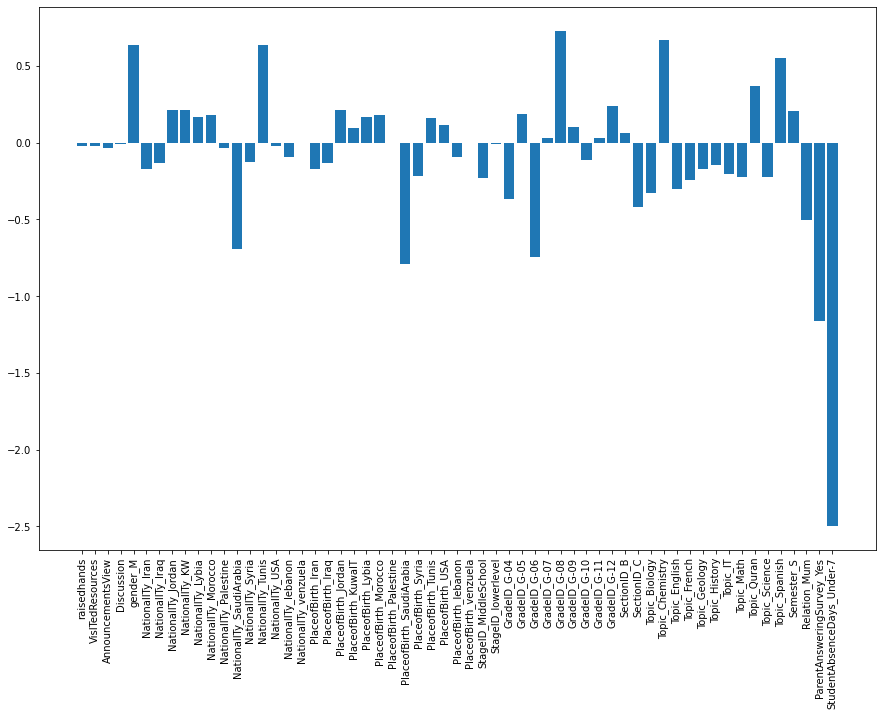

In [121]:
fig = plt.figure(figsize=(15, 10))
plt.bar(X.columns, model_lr.coef_[1, :]) # for Low
plt.xticks(rotation=90)
plt.show()

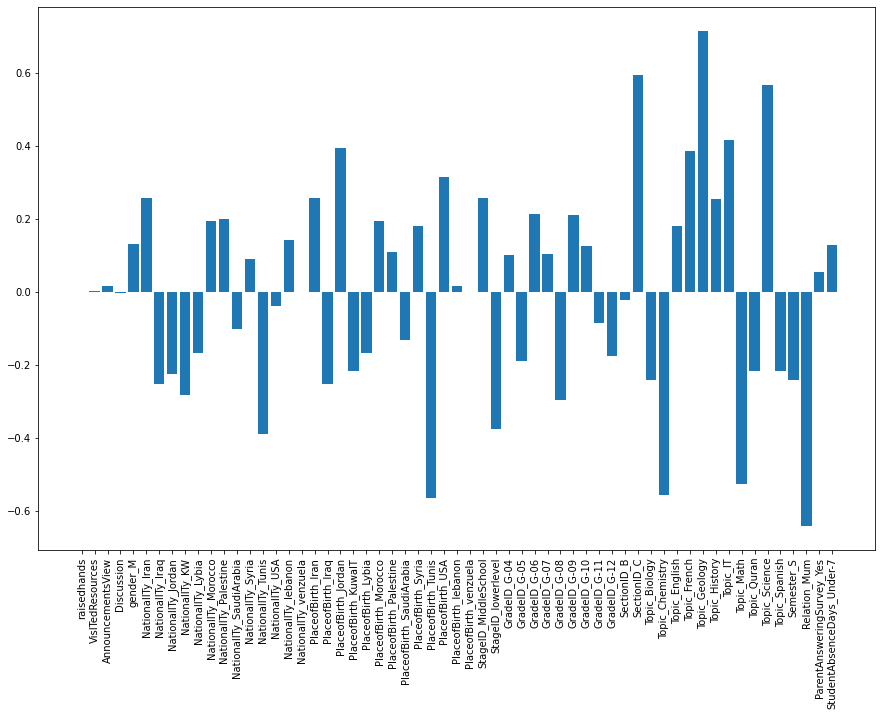

In [122]:
fig = plt.figure(figsize=(15, 10))
plt.bar(X.columns, model_lr.coef_[2, :]) # for Middle
plt.xticks(rotation=90)
plt.show()

##### XGBoost

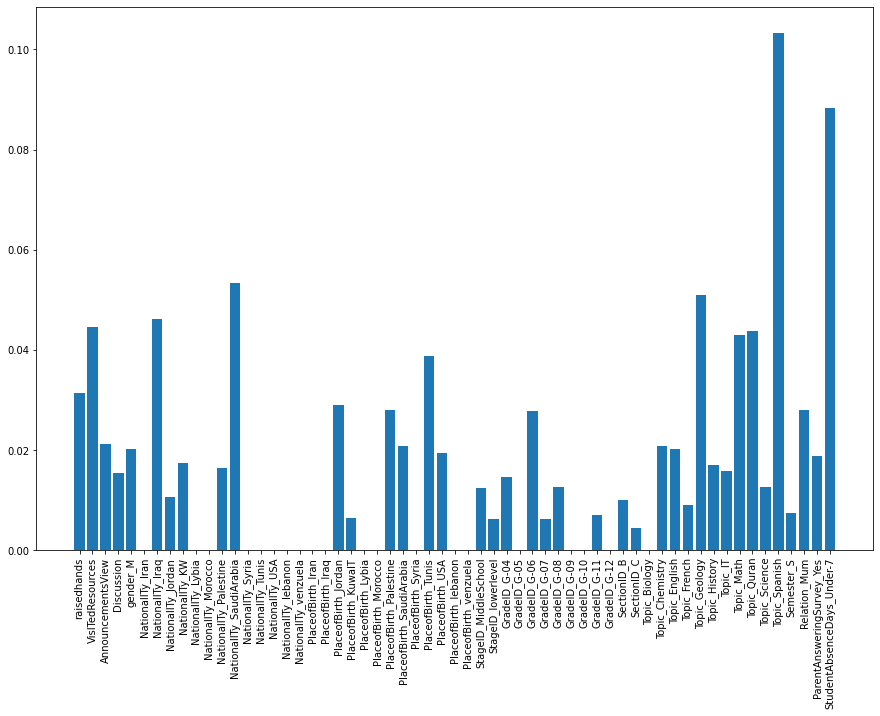

In [120]:
fig = plt.figure(figsize=(15, 10))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

##### To-Do
- numeric -> scailing
- nationaility, place of birth -> remove one of them
- model check again